In [1]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
api_service_name = "youtube"
api_version = "v3"
api_key = ''
youtube = build('youtube', 'v3', developerKey = api_key)

## Ê∏¨Ë©¶‰∏¶ÂèñÂæóÈ†ªÈÅìÊ¨Ñ‰ΩçË≥áË®ä

request‰ΩøÁî®Ë™™ÊòéÔºöhttps://developers.google.com/youtube/v3/docs/channels/list
JsonFormatterÔºöhttps://jsonformatter.curiousconcept.com/#

In [5]:
channel_id = 'UCln9P4Qm3-EAY4aiEPmRwEA' # Ado
def test_get_channel_stats(youtube, channel_id):
    
    request = youtube.channels().list(
        part='snippet,contentDetails,statistics,topicDetails,brandingSettings,contentOwnerDetails,localizations',
        id=channel_id)
    response = request.execute()
    return response

In [6]:
test_get_channel_stats(youtube, channel_id)

{'kind': 'youtube#channelListResponse',
 'etag': 'V2iI9useIIqXQN1thUSJSD-Qw30',
 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5},
 'items': [{'kind': 'youtube#channel',
   'etag': 'oeL5RU-TjAo2vA6CMkU6wBd9F8s',
   'id': 'UCln9P4Qm3-EAY4aiEPmRwEA',
   'snippet': {'title': 'Ado',
    'description': 'ÂÖÉÊ∞ó„Åß„Åô„ÄÇ',
    'customUrl': '@ado1024',
    'publishedAt': '2018-08-18T02:02:50Z',
    'thumbnails': {'default': {'url': 'https://yt3.ggpht.com/I3ckNVLPQq04aQklOnRctTEnBjf7pkppVLV7WYe4Nb4g3sge1h-2IlXAvLnRGgrMkMfL4NadPQ=s88-c-k-c0x00ffffff-no-nd-rj',
      'width': 88,
      'height': 88},
     'medium': {'url': 'https://yt3.ggpht.com/I3ckNVLPQq04aQklOnRctTEnBjf7pkppVLV7WYe4Nb4g3sge1h-2IlXAvLnRGgrMkMfL4NadPQ=s240-c-k-c0x00ffffff-no-nd-rj',
      'width': 240,
      'height': 240},
     'high': {'url': 'https://yt3.ggpht.com/I3ckNVLPQq04aQklOnRctTEnBjf7pkppVLV7WYe4Nb4g3sge1h-2IlXAvLnRGgrMkMfL4NadPQ=s800-c-k-c0x00ffffff-no-nd-rj',
      'width': 800,
      'height': 800}},
    'local

## Ê∏¨Ë©¶‰∏¶‰∫ÜËß£Ê¨Ñ‰ΩçÂæåÔºåÈáùÂ∞ç‰∏çÂêåÈ†ªÈÅìÂÅöÊü•Ë©¢

In [7]:
channel_ids = ['UCAYrMNl92jw6cpjdpBP8JyA', # Ru's Paino RuÂë≥Êò•Êç≤
               'UCI7ktPB6toqucpkkCiolwLg', # Pan Paino1
               'UCyjuFsbclXyntSRMBAILzbw', # 2CELLOS
               'UCln9P4Qm3-EAY4aiEPmRwEA', # Ado
               'UCvpredjG93ifbCP1Y77JyFA', # YOASOBI1
               'UCPKlrgZXnnb89nSeITvTdGA', # ÊòüÈáéÊ∫ê
               'UC2JzylaIF8qeowc7-5VwwmA', # ÁæéÊ≥¢
               'UC9zY_E8mcAo_Oq772LEZq8Q', # The First Take
               'UCDbQblY1XASbgqOXmy6FOFQ' # kobasolo
              ]

In [8]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    requests = youtube.channels().list(
        part="snippet,contentDetails,statistics,topicDetails,brandingSettings,contentOwnerDetails,localizations",
        id = ','.join(channel_ids))
    response = requests.execute()
    
#     return response
# Ëã•‰ª•ÊâæÂõûÂà∞Ê¨Ñ‰ΩçÂÜçÂèñÊ∂àË®ªËß£
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'], # È†ªÈÅìÂêçÁ®±
                    Description = response['items'][i]['snippet']['description'], # È†ªÈÅì‰ªãÁ¥π
                    Published = response['items'][i]['snippet']['publishedAt'], # È†ªÈÅìÂâµÂª∫Êó•Êúü
                    Country = response['items'][i]['snippet']['country'], # È†ªÈÅì‰ΩçÁΩÆ
                    Subscribers = response['items'][i]['statistics']['subscriberCount'], # Ë®ÇÈñ±‰∫∫Êï∏
                    Views = response['items'][i]['statistics']['viewCount'], # Á∏ΩËßÄÁúã‰∫∫Êï∏
                    Playlist = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'], # Á∏Ω‰∏äÂÇ≥ÂΩ±Áâáid
                    VideoCount = response['items'][i]['statistics']['videoCount'], # È†ªÈÅìÊï∏Èáè
                    Topic = response['items'][i]['topicDetails']['topicCategories'], # È†ªÈÅìÈ°ûÂûã
                    Image = response['items'][i]['snippet']['thumbnails']['high']['url']) # È†ªÈÅìÂúñÁâá
#                     Keyword = response['items'][i]['brandingSettings']['channel']) # ÈóúÈçµÂ≠ó
        all_data.append(data)
    return all_data

In [10]:
music_channel = get_channel_stats(youtube, channel_ids)

## ËΩâÊàêdataframe

In [12]:
channel_data = pd.DataFrame(music_channel)
channel_data

Channel_name                                        Description  \
0         Pan Piano  Âè∞Êπæ„ÅÆ„Éî„Ç¢„Éã„Çπ„Éà„Åß„ÅôÔºÅ \n„Ç¢„Éã„ÇΩ„É≥„ÇíÂºæ„ÅÑ„Å¶„Åæ„ÅôÔΩû \nËâØ„Åã„Å£„Åü„Çâ„ÄÅ„ÉÅ„É£„É≥„Éç„É´ÁôªÈå≤„ÅäÈ°ò„ÅÑ„Åó„Åæ...   
1  Ru's Piano RuÂë≥Êò•Êç≤  I‚Äôm RuRu, a piano youtuber from Taiwan.\nMakin...   
2               Ado                                              ÂÖÉÊ∞ó„Åß„Åô„ÄÇ   
3          kobasolo  ÊØéÈÄ±ÈáëÊõú19ÊôÇÊõ¥Êñ∞!!Èü≥Ê•Ω„Éó„É≠„Éá„É•„Éº„Çµ„Éº„ÄÅ„Éü„É•„Éº„Ç∏„Ç∑„É£„É≥„Å®„Åó„Å¶Ê¥ªÂãï„Åô„Çã„Ç≥„Éê„ÇΩ„É≠„ÅåË¥à„Çã„Ç®„É≥„Çø„Éº...   
4               ÊòüÈáéÊ∫ê  Èü≥Ê•ΩÂÆ∂„Éª‰ø≥ÂÑ™„ÉªÊñáÁ≠ÜÂÆ∂„ÄÇ\n2010Âπ¥„Å´1st„Ç¢„É´„Éê„É†„Äé„Å∞„Åã„ÅÆ„ÅÜ„Åü„Äè„Å´„Å¶„ÇΩ„É≠„Éá„Éì„É•„Éº„ÄÇ2016...   
5    THE FIRST TAKE  A microphone and a white studio.\n\nAnd 1 rule...   
6           2CELLOS  The official home of 2CELLOS - we post our new...   
7   Ayase / YOASOBI  „Éú„Ç´„É≠P„ÉªAyase„ÄÅ„Åù„Åó„Å¶Ayase„Åå„Ç≥„É≥„Éù„Éº„Ç∂„Éº„ÇíÂãô„ÇÅ„Çã„É¶„Éã„ÉÉ„Éà„ÉªYOASOBI„ÅÆYou...   
8                ÁæéÊ≥¢                      „ÄêÁæéÊ≥¢ Official Youtube Channel„Äë   

                     Published Country Subscribers       Views  \
0         2016-07-27T15:21:51Z      TW     3340000   518252207   
1         2018-03-14T09:38:37Z      TW     2240000   287581808   
2         2018-08-18T02:02:50Z      JP     3660000  1246944609   
3         2008-06-30T15:34:30Z      JP     3000000  1411811905   
4         2015-05-08T03:39:24Z      JP     1460000   912151607   
5  2019-11-05T11:51:17.905563Z      JP     6620000  2298040682   
6         2011-10-17T21:02:43Z      HR     6260000  1602191143   
7         2018-11-16T23:11:18Z      JP     3960000  1984944846   
8         2016-01-03T14:58:38Z      JP     1300000   406038151   

                   Playlist VideoCount  \
0  UUI7ktPB6toqucpkkCiolwLg        537   
1  UUAYrMNl92jw6cpjdpBP8JyA        389   
2  UUln9P4Qm3-EAY4aiEPmRwEA         80   
3  UUDbQblY1XASbgqOXmy6FOFQ        498   
4  UUPKlrgZXnnb89nSeITvTdGA         94   
5  UU9zY_E8mcAo_Oq772LEZq8Q        410   
6  UUyjuFsbclXyntSRMBAILzbw        213   
7  UUvpredjG93ifbCP1Y77JyFA        105   
8  UU2JzylaIF8qeowc7-5VwwmA          7   

                                               Topic  \
0  [https://en.wikipedia.org/wiki/Classical_music...   
1  [https://en.wikipedia.org/wiki/Music_of_Asia, ...   
2  [https://en.wikipedia.org/wiki/Pop_music, http...   
3  [https://en.wikipedia.org/wiki/Pop_music, http...   
4  [https://en.wikipedia.org/wiki/Pop_music, http...   
5  [https://en.wikipedia.org/wiki/Pop_music, http...   
6  [https://en.wikipedia.org/wiki/Pop_music, http...   
7  [https://en.wikipedia.org/wiki/Pop_music, http...   
8  [https://en.wikipedia.org/wiki/Music_of_Asia, ...   

                                               Image  
0  https://yt3.ggpht.com/ytc/AMLnZu-uZODxdm-BCEo0...  
1  https://yt3.ggpht.com/ytc/AMLnZu_-ZUJbCF-LRu25...  
2  https://yt3.ggpht.com/I3ckNVLPQq04aQklOnRctTEn...  
3  https://yt3.ggpht.com/ytc/AMLnZu-9S3og5Ip2zFAS...  
4  https://yt3.ggpht.com/DLCVX6ArRGaHMe4k4N7Q_QtY...  
5  https://yt3.ggpht.com/ytc/AMLnZu9H0hC1Gt8ZLT4V...  
6  https://yt3.ggpht.com/ytc/AMLnZu9V7gXnpIUCJYKK...  
7  https://yt3.ggpht.com/ytc/AMLnZu_8o8D8yLIaOLRZ...  
8  https://yt3.ggpht.com/ytc/AMLnZu-a_zfDCmdvUihG...

## Êü•ÁúãË≥áÊñôÂûãÊÖã‰∏¶Â∞áÊï∏ÂÄºËΩâÁÇ∫Êï∏ÂÄºÂûãÊÖã

In [13]:
channel_data.dtypes

Channel_name    object
Description     object
Published       object
Country         object
Subscribers     object
Views           object
Playlist        object
VideoCount      object
Topic           object
Image           object
dtype: object

In [14]:
channel_data['Published'] = pd.to_datetime(channel_data['Published']).dt.date
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['VideoCount'] = pd.to_numeric(channel_data['VideoCount'])
print(channel_data.dtypes)
channel_data

Channel_name    object
Description     object
Published       object
Country         object
Subscribers      int64
Views            int64
Playlist        object
VideoCount       int64
Topic           object
Image           object
dtype: object


Channel_name                                        Description  \
0         Pan Piano  Âè∞Êπæ„ÅÆ„Éî„Ç¢„Éã„Çπ„Éà„Åß„ÅôÔºÅ \n„Ç¢„Éã„ÇΩ„É≥„ÇíÂºæ„ÅÑ„Å¶„Åæ„ÅôÔΩû \nËâØ„Åã„Å£„Åü„Çâ„ÄÅ„ÉÅ„É£„É≥„Éç„É´ÁôªÈå≤„ÅäÈ°ò„ÅÑ„Åó„Åæ...   
1  Ru's Piano RuÂë≥Êò•Êç≤  I‚Äôm RuRu, a piano youtuber from Taiwan.\nMakin...   
2               Ado                                              ÂÖÉÊ∞ó„Åß„Åô„ÄÇ   
3          kobasolo  ÊØéÈÄ±ÈáëÊõú19ÊôÇÊõ¥Êñ∞!!Èü≥Ê•Ω„Éó„É≠„Éá„É•„Éº„Çµ„Éº„ÄÅ„Éü„É•„Éº„Ç∏„Ç∑„É£„É≥„Å®„Åó„Å¶Ê¥ªÂãï„Åô„Çã„Ç≥„Éê„ÇΩ„É≠„ÅåË¥à„Çã„Ç®„É≥„Çø„Éº...   
4               ÊòüÈáéÊ∫ê  Èü≥Ê•ΩÂÆ∂„Éª‰ø≥ÂÑ™„ÉªÊñáÁ≠ÜÂÆ∂„ÄÇ\n2010Âπ¥„Å´1st„Ç¢„É´„Éê„É†„Äé„Å∞„Åã„ÅÆ„ÅÜ„Åü„Äè„Å´„Å¶„ÇΩ„É≠„Éá„Éì„É•„Éº„ÄÇ2016...   
5    THE FIRST TAKE  A microphone and a white studio.\n\nAnd 1 rule...   
6           2CELLOS  The official home of 2CELLOS - we post our new...   
7   Ayase / YOASOBI  „Éú„Ç´„É≠P„ÉªAyase„ÄÅ„Åù„Åó„Å¶Ayase„Åå„Ç≥„É≥„Éù„Éº„Ç∂„Éº„ÇíÂãô„ÇÅ„Çã„É¶„Éã„ÉÉ„Éà„ÉªYOASOBI„ÅÆYou...   
8                ÁæéÊ≥¢                      „ÄêÁæéÊ≥¢ Official Youtube Channel„Äë   

    Published Country  Subscribers       Views                  Playlist  \
0  2016-07-27      TW      3340000   518252207  UUI7ktPB6toqucpkkCiolwLg   
1  2018-03-14      TW      2240000   287581808  UUAYrMNl92jw6cpjdpBP8JyA   
2  2018-08-18      JP      3660000  1246944609  UUln9P4Qm3-EAY4aiEPmRwEA   
3  2008-06-30      JP      3000000  1411811905  UUDbQblY1XASbgqOXmy6FOFQ   
4  2015-05-08      JP      1460000   912151607  UUPKlrgZXnnb89nSeITvTdGA   
5  2019-11-05      JP      6620000  2298040682  UU9zY_E8mcAo_Oq772LEZq8Q   
6  2011-10-17      HR      6260000  1602191143  UUyjuFsbclXyntSRMBAILzbw   
7  2018-11-16      JP      3960000  1984944846  UUvpredjG93ifbCP1Y77JyFA   
8  2016-01-03      JP      1300000   406038151  UU2JzylaIF8qeowc7-5VwwmA   

   VideoCount                                              Topic  \
0         537  [https://en.wikipedia.org/wiki/Classical_music...   
1         389  [https://en.wikipedia.org/wiki/Music_of_Asia, ...   
2          80  [https://en.wikipedia.org/wiki/Pop_music, http...   
3         498  [https://en.wikipedia.org/wiki/Pop_music, http...   
4          94  [https://en.wikipedia.org/wiki/Pop_music, http...   
5         410  [https://en.wikipedia.org/wiki/Pop_music, http...   
6         213  [https://en.wikipedia.org/wiki/Pop_music, http...   
7         105  [https://en.wikipedia.org/wiki/Pop_music, http...   
8           7  [https://en.wikipedia.org/wiki/Music_of_Asia, ...   

                                               Image  
0  https://yt3.ggpht.com/ytc/AMLnZu-uZODxdm-BCEo0...  
1  https://yt3.ggpht.com/ytc/AMLnZu_-ZUJbCF-LRu25...  
2  https://yt3.ggpht.com/I3ckNVLPQq04aQklOnRctTEn...  
3  https://yt3.ggpht.com/ytc/AMLnZu-9S3og5Ip2zFAS...  
4  https://yt3.ggpht.com/DLCVX6ArRGaHMe4k4N7Q_QtY...  
5  https://yt3.ggpht.com/ytc/AMLnZu9H0hC1Gt8ZLT4V...  
6  https://yt3.ggpht.com/ytc/AMLnZu9V7gXnpIUCJYKK...  
7  https://yt3.ggpht.com/ytc/AMLnZu_8o8D8yLIaOLRZ...  
8  https://yt3.ggpht.com/ytc/AMLnZu-a_zfDCmdvUihG...

## Ëº∏Âá∫Êàêexcel

In [15]:
channel_data.to_excel('music_channel.xlsx')

In [39]:
# sns.set(font='SimHei', rc={'figure.figsize':(20,8)})
# ax = sns.barplot(x='Channel_name', y = 'Subscribers', data=channel_data)

## Êü•ÁúãÈ†ªÈÅìË®ÇÈñ±‰∫∫Êï∏

In [34]:
def get_barplot(x, y):
    plt.figure(figsize = (20,8))
    plt.bar(x, y, color=['#5975a4', '#cc8963', '#5f9e6e', '#b55e60', '#857aab', '#8d7866', '#d095bf', '#8c8c8c', '#c1b37f'])
    plt.title('Music Channel',fontsize=20)
    plt.show()

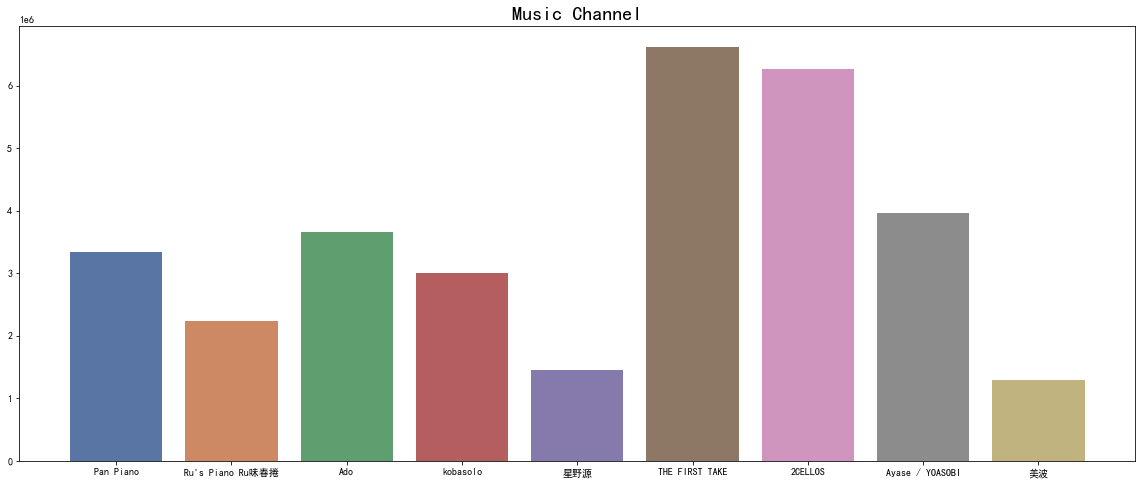

In [35]:
get_barplot(channel_data['Channel_name'], channel_data['Subscribers']) 

## Êü•ÁúãÁõÆÂâçÁ∏ΩËßÄÁúã‰∫∫Êï∏

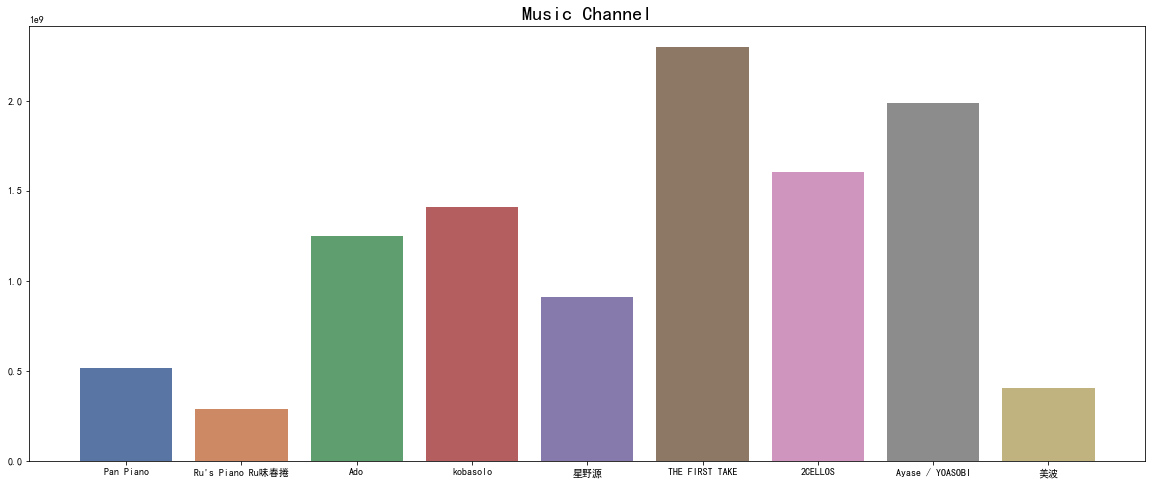

In [36]:
get_barplot(channel_data['Channel_name'], channel_data['Views']) 

## Êü•ÁúãÈ†ªÈÅì‰∏äÂÇ≥ÂΩ±ÁâáÊï∏Èáè

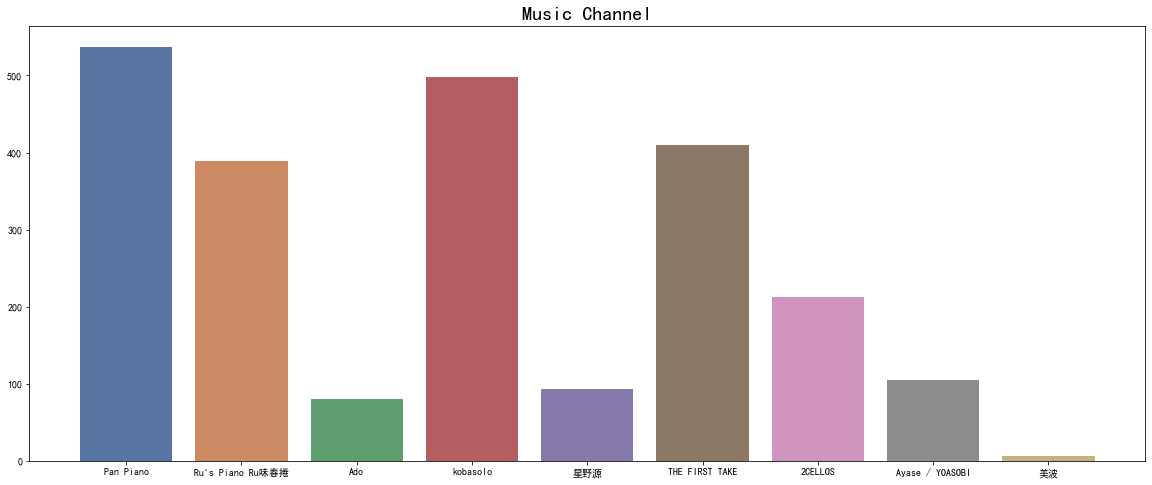

In [37]:
get_barplot(channel_data['Channel_name'], channel_data['VideoCount']) 

## ÂèñÂæóÈ†ªÈÅìÂÖ®ÈÉ®ÂΩ±ÁâáÁöÑ id(‰ª•adoÁÇ∫‰æã)
ÂèñÂæóÂΩ±ÁâáË≥áË®äÔºöhttps://developers.google.com/youtube/v3/docs/playlistItems/list

In [43]:
channel_data[['Channel_name', 'Playlist', 'VideoCount']]

Channel_name                  Playlist  VideoCount
0         Pan Piano  UUI7ktPB6toqucpkkCiolwLg         537
1  Ru's Piano RuÂë≥Êò•Êç≤  UUAYrMNl92jw6cpjdpBP8JyA         389
2               Ado  UUln9P4Qm3-EAY4aiEPmRwEA          80
3          kobasolo  UUDbQblY1XASbgqOXmy6FOFQ         498
4               ÊòüÈáéÊ∫ê  UUPKlrgZXnnb89nSeITvTdGA          94
5    THE FIRST TAKE  UU9zY_E8mcAo_Oq772LEZq8Q         410
6           2CELLOS  UUyjuFsbclXyntSRMBAILzbw         213
7   Ayase / YOASOBI  UUvpredjG93ifbCP1Y77JyFA         105
8                ÁæéÊ≥¢  UU2JzylaIF8qeowc7-5VwwmA           7

In [44]:
playlist_id = channel_data.loc[channel_data['Channel_name'] == 'Ado', 'Playlist'].iloc[0]
playlist_id

'UUln9P4Qm3-EAY4aiEPmRwEA'

In [45]:
def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
              part = 'contentDetails',
              playlistId = playlist_id,
              maxResults = 50) # 50 is max
    response = request.execute()
    
    video_ids = []
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages: 
        if next_page_token is None:
            more_pages = False
        else: # jsonÂ≠òÂú®nextPageTokenÔºåÈÄèÈÅé‰ª•‰∏ãÂèñÂæó50‰ª•‰∏äÁöÑvideos
            request = youtube.playlistItems().list(
                    part = 'contentDetails',
                    playlistId = playlist_id,
                    pageToken = next_page_token)
            response = request.execute()
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            next_page_token = response.get('nextPageToken')
    print('ÂΩ±ÁâáÊï∏Èáè:', len(video_ids))
    return video_ids

In [46]:
video_ids = get_video_ids(youtube, playlist_id)
video_ids

ÂΩ±ÁâáÊï∏Èáè: 80


['oL6ooQb-ZRQ',
 'V9_ZpqfqHFI',
 'd7DTFuMnoxg',
 'b3GCfyNKeLs',
 'hyV1AJiFNyo',
 '0iYLJLXX-Sw',
 'x1UsJ2Znjk0',
 '7i_nc5GGIsI',
 'gt-v_YCkaMY',
 'sk1Z-Hqwwog',
 '1FliVTcX8bQ',
 'TRk9_QLZYvI',
 'u-G_zzhLSy8',
 '_wZfYtYwxro',
 'iRMYLKIWyUk',
 'ZHAnZTVF_10',
 '55W2LxbQoHc',
 '5_-TcIOxm60',
 'kOW0rt4fpHg',
 'DTxrPgpW9Tc',
 'BMb5IetESGE',
 'wuYIVacOTF8',
 'Uuqp7WH4-Wo',
 'zcgoi61B5D8',
 '3tPBEjxqEc4',
 'nuvNgt60km4',
 'ECp9I1CPkJQ',
 'TTxzYrbDLwA',
 'fBnAP_FOy5U',
 'cyq5-StPISU',
 'PJTr-EUmbaA',
 'Flw53ezXBYg',
 'PcA3BIzKxiw',
 '0VkAQQKITSw',
 'xRayul0ZnkY',
 'dLmaSaCVFx0',
 'y-dMrhGdCms',
 'Cw_tD7MXeEI',
 'pWZwiUaA0O8',
 'jTVSU-Lr1ew',
 '-KQAAeUTOQ4',
 'P12337hMnbI',
 'cSgZxz3le7s',
 'eI_wC_Mlel4',
 'UcpAHDF8yZI',
 '1OI4Bp8fGYw',
 'YnSW8ian29w',
 'zs6Mnu4gMHM',
 'sOiMD45QGLs',
 'm_x_aUharLc',
 'QLsXgj4_gOc',
 'jg09lNupc1s',
 'nMpD5q5wqPM',
 'YTQV48V44Sw',
 'G_jdDwi3Otw',
 'Qp3b-RXtz4w',
 '1M_A3OIEceg',
 '13dECLUD-5Q',
 'n_sDtV5oZR0',
 'UoGacSBPYPc',
 'aOIrxUTBRgs',
 'X9aKVLPoKJk',
 'slcfa-

## Êü•ÁúãÂΩ±ÁâáÁöÑÊ¨Ñ‰ΩçÊ†ºÂºè

In [47]:
def test_channel_video_detail(youtube, video_ids):
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
        part = 'snippet, statistics,topicDetails',
        id=','.join(video_ids[i:i+50]))
    response = request.execute()
    
    
    return response

In [ ]:
test_channel_video_detail(youtube, video_ids)

## ÊäìÂèñ‰∏çÂêåÊ¨Ñ‰ΩçË≥áÊñô

In [49]:
def get_channel_video_detail(youtube, video_ids):
    
    all_video_stats = []
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
        part = 'snippet, statistics, topicDetails',
        id=','.join(video_ids[i:i+50]))
        response = request.execute()
        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               Description = video['snippet']['description'],
                               PublishedAt = video['snippet']['publishedAt'],
                               Lauguage = video['snippet']['defaultAudioLanguage'],
#                                Tags = video['snippet']['tags'],
                               Views = video['statistics']['viewCount'],
                               Likes = video['statistics']['likeCount'],
                               CommentCount = video['statistics']['commentCount'],
                               Image = video['snippet']['thumbnails']['high']['url'])
#                                Topic = video['topicDetails']['topicCategories'])
            all_video_stats.append(video_stats)
    return all_video_stats

In [51]:
video_details = get_channel_video_detail(youtube, video_ids)

## Â∞áÂΩ±ÁâáËΩâÊàêDataFrame

In [52]:
video_data = pd.DataFrame(video_details)
video_data

Title  \
0                      „Äê„Ç¢„Éº„Ç´„Ç§„Éñ„Äë„É©„Ç§„Éñ„ÅÆ„ÅäÈ°ò„ÅÑ„Å®„Ç´„É†„Éë„Éç„É´„É©„ÅÆÊÑüÊÉ≥   
1   „ÄêAdo„ÄëTot MusicaÔºà„Ç¶„Çø from ONE PIECE FILM REDÔºâ   
2            Ado„Äé„Ç¶„Çø„ÅÆÊ≠å ONE PIECE FILM RED„ÄèÁô∫Â£≤Ë®òÂøµÁâπÁï™   
3       „ÄêAdo„Äë‰∏ñÁïå„ÅÆ„Å§„Å•„ÅçÔºà„Ç¶„Çø from ONE PIECE FILM REDÔºâ   
4     „ÄêAdo„Äë„Ç¶„Çø„Ç´„Çø„É©„É©„Éê„Ç§Ôºà„Ç¶„Çø from ONE PIECE FILM REDÔºâ   
..                                          ...   
75                              „ÄêAdo„ÄëÊÅãÊÑõË£ÅÂà§ Ê≠å„ÅÑ„Åæ„Åó„Åü   
76                   „ÄêAdo„ÄëËÑ≥ÂÜÖÈù©ÂëΩ„Ç¨„Éº„É´ Ê≠å„ÅÑ„Åæ„Åó„Åü„Äê„ÉØ„É≥„Ç≥„Éº„É©„Çπ„Äë   
77                    „ÄêAdo„Äë„Ç≠„É©„Ç§„Éª„Ç≠„É©„Ç§„Éª„Ç∏„Ç¨„Éí„ÉÄ„Ç§ÔºÅ Ê≠å„ÅÑ„Åæ„Åó„Åü   
78                  „ÄêAdo„ÄëÂ¶ÑÊÉ≥ÊÑüÂÇ∑‰ª£ÂÑüÈÄ£Áõü Ê≠å„ÅÑ„Åæ„Åó„Åü„Äê„ÉØ„É≥„Ç≥„Éº„É©„Çπ„Äë   
79                      „ÄêAdo„Äë„É°„Éº„Éô„É´ Ê≠å„ÅÑ„Åæ„Åó„Åü„Äê„ÉØ„É≥„Ç≥„Éº„É©„Çπ„Äë   

                                          Description           PublishedAt  \
0           Êï∞Êó•Èñì„Å†„Åë„Ç¢„Éº„Ç´„Ç§„Éñ„ÇíÊÆã„Åó„Åæ„Åô\n\n„Åì„Çå„Åã„Çâ„ÅÆ„É©„Ç§„Éñ„Å´ÂèÇÂä†„Åô„ÇãÊñπ„ÅØËÅû„ÅÑ„Å¶„Åè„Å†„Åï„ÅÑ  2022-08-21T12:31:29Z   
1   Ê±Ç„ÇÅ„Çâ„Çå„Åü„ÇãÊïë‰∏ñ‰∏ª\n\n‚ñº„ÄéTot Musica„Äè Streaming & Downloa...  2022-08-17T11:00:12Z   
2   „Ç¢„É´„Éê„É†„Äé„Ç¶„Çø„ÅÆÊ≠å ONE PIECE FILM RED„ÄèÁô∫Â£≤Ë®òÂøµÁâπÁï™„Ç¢„Éº„Ç´„Ç§„ÉñÂÖ¨Èñã‰∏≠ÔºÅ\n...  2022-08-10T10:45:14Z   
3   „Åæ„Åü„Åä„Çì„Å™„ÅòÊ≠å„ÇíÊ≠å„ÅÜ„Åü„Å≥\n„ÅÇ„Å™„Åü„ÇíÊÉ≥„ÅÜ„Åß„Åó„Çá„ÅÜ\n\n‚ñº„Äé‰∏ñÁïå„ÅÆ„Å§„Å•„Åç„Äè Streamin...  2022-08-10T10:30:13Z   
4   „Çè„Åü„Åó„Åå„ÇÑ„Çâ„Å™„Åç„ÇÉ „Å†„Åã„ÇâÈÇ™È≠î„Åó„Å™„ÅÑ„Åß„ÄÄ„ÅäÈ°ò„ÅÑ...\n\n‚ñº„Äé„Ç¶„Çø„Ç´„Çø„É©„É©„Éê„Ç§„Äè Stre...  2022-08-06T09:00:13Z   
..                                                ...                   ...   
75  Ê≠å„Å£„Å¶„Åø„Åü„É™„Çπ„Éà\nhttps://www.youtube.com/playlist?lis...  2018-08-26T12:45:00Z   
76  Ê≠å„Å£„Å¶„Åø„Åü„É™„Çπ„Éà\nhttps://www.youtube.com/playlist?lis...  2018-08-26T12:00:07Z   
77  Ê≠å„Å£„Å¶„Åø„Åü„É™„Çπ„Éà\nhttps://www.youtube.com/playlist?lis...  2018-08-26T12:00:06Z   
78  Ê≠å„Å£„Å¶„Åø„Åü„É™„Çπ„Éà\nhttps://www.youtube.com/playlist?lis...  2018-08-26T12:00:02Z   
79  Ê≠å„Å£„Å¶„Åø„Åü„É™„Çπ„Éà\nhttps://www.youtube.com/playlist?lis...  2018-08-26T11:45:00Z   

   Lauguage     Views   Likes CommentCount  \
0     en-US    696980   33471          476   
1        ja   6908302  362332        11343   
2        ja   1446351   45970         2232   
3        ja   3628663  136588         3880   
4        ja  10318747  252443         7081   
..      ...       ...     ...          ...   
75       ja   7122042   92198         1843   
76       ja    461723   13002          550   
77       ja   4416140   74480         1612   
78       ja   1257211   37643          575   
79       ja   1050952   28693          979   

                                               Image  
0   https://i.ytimg.com/vi/oL6ooQb-ZRQ/hqdefault.jpg  
1   https://i.ytimg.com/vi/V9_ZpqfqHFI/hqdefault.jpg  
2   https://i.ytimg.com/vi/d7DTFuMnoxg/hqdefault.jpg  
3   https://i.ytimg.com/vi/b3GCfyNKeLs/hqdefault.jpg  
4   https://i.ytimg.com/vi/hyV1AJiFNyo/hqdefault.jpg  
..                                               ...  
75  https://i.ytimg.com/vi/iHIrEqU5cwM/hqdefault.jpg  
76  https://i.ytimg.com/vi/qL3chh5M5d0/hqdefault.jpg  
77  https://i.ytimg.com/vi/gmJiYoRhO5g/hqdefault.jpg  
78  https://i.ytimg.com/vi/Io9gOyAlq9g/hqdefault.jpg  
79  https://i.ytimg.com/vi/hOxAQO57zyY/hqdefault.jpg  

[80 rows x 8 columns]

## Ë≥áÊñôÂûãÊÖãËΩâÊèõ

In [53]:
video_data['PublishedAt'] = pd.to_datetime(video_data['PublishedAt']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data['CommentCount'] = pd.to_numeric(video_data['CommentCount'])
video_data

Title  \
0                      „Äê„Ç¢„Éº„Ç´„Ç§„Éñ„Äë„É©„Ç§„Éñ„ÅÆ„ÅäÈ°ò„ÅÑ„Å®„Ç´„É†„Éë„Éç„É´„É©„ÅÆÊÑüÊÉ≥   
1   „ÄêAdo„ÄëTot MusicaÔºà„Ç¶„Çø from ONE PIECE FILM REDÔºâ   
2            Ado„Äé„Ç¶„Çø„ÅÆÊ≠å ONE PIECE FILM RED„ÄèÁô∫Â£≤Ë®òÂøµÁâπÁï™   
3       „ÄêAdo„Äë‰∏ñÁïå„ÅÆ„Å§„Å•„ÅçÔºà„Ç¶„Çø from ONE PIECE FILM REDÔºâ   
4     „ÄêAdo„Äë„Ç¶„Çø„Ç´„Çø„É©„É©„Éê„Ç§Ôºà„Ç¶„Çø from ONE PIECE FILM REDÔºâ   
..                                          ...   
75                              „ÄêAdo„ÄëÊÅãÊÑõË£ÅÂà§ Ê≠å„ÅÑ„Åæ„Åó„Åü   
76                   „ÄêAdo„ÄëËÑ≥ÂÜÖÈù©ÂëΩ„Ç¨„Éº„É´ Ê≠å„ÅÑ„Åæ„Åó„Åü„Äê„ÉØ„É≥„Ç≥„Éº„É©„Çπ„Äë   
77                    „ÄêAdo„Äë„Ç≠„É©„Ç§„Éª„Ç≠„É©„Ç§„Éª„Ç∏„Ç¨„Éí„ÉÄ„Ç§ÔºÅ Ê≠å„ÅÑ„Åæ„Åó„Åü   
78                  „ÄêAdo„ÄëÂ¶ÑÊÉ≥ÊÑüÂÇ∑‰ª£ÂÑüÈÄ£Áõü Ê≠å„ÅÑ„Åæ„Åó„Åü„Äê„ÉØ„É≥„Ç≥„Éº„É©„Çπ„Äë   
79                      „ÄêAdo„Äë„É°„Éº„Éô„É´ Ê≠å„ÅÑ„Åæ„Åó„Åü„Äê„ÉØ„É≥„Ç≥„Éº„É©„Çπ„Äë   

                                          Description PublishedAt Lauguage  \
0           Êï∞Êó•Èñì„Å†„Åë„Ç¢„Éº„Ç´„Ç§„Éñ„ÇíÊÆã„Åó„Åæ„Åô\n\n„Åì„Çå„Åã„Çâ„ÅÆ„É©„Ç§„Éñ„Å´ÂèÇÂä†„Åô„ÇãÊñπ„ÅØËÅû„ÅÑ„Å¶„Åè„Å†„Åï„ÅÑ  2022-08-21    en-US   
1   Ê±Ç„ÇÅ„Çâ„Çå„Åü„ÇãÊïë‰∏ñ‰∏ª\n\n‚ñº„ÄéTot Musica„Äè Streaming & Downloa...  2022-08-17       ja   
2   „Ç¢„É´„Éê„É†„Äé„Ç¶„Çø„ÅÆÊ≠å ONE PIECE FILM RED„ÄèÁô∫Â£≤Ë®òÂøµÁâπÁï™„Ç¢„Éº„Ç´„Ç§„ÉñÂÖ¨Èñã‰∏≠ÔºÅ\n...  2022-08-10       ja   
3   „Åæ„Åü„Åä„Çì„Å™„ÅòÊ≠å„ÇíÊ≠å„ÅÜ„Åü„Å≥\n„ÅÇ„Å™„Åü„ÇíÊÉ≥„ÅÜ„Åß„Åó„Çá„ÅÜ\n\n‚ñº„Äé‰∏ñÁïå„ÅÆ„Å§„Å•„Åç„Äè Streamin...  2022-08-10       ja   
4   „Çè„Åü„Åó„Åå„ÇÑ„Çâ„Å™„Åç„ÇÉ „Å†„Åã„ÇâÈÇ™È≠î„Åó„Å™„ÅÑ„Åß„ÄÄ„ÅäÈ°ò„ÅÑ...\n\n‚ñº„Äé„Ç¶„Çø„Ç´„Çø„É©„É©„Éê„Ç§„Äè Stre...  2022-08-06       ja   
..                                                ...         ...      ...   
75  Ê≠å„Å£„Å¶„Åø„Åü„É™„Çπ„Éà\nhttps://www.youtube.com/playlist?lis...  2018-08-26       ja   
76  Ê≠å„Å£„Å¶„Åø„Åü„É™„Çπ„Éà\nhttps://www.youtube.com/playlist?lis...  2018-08-26       ja   
77  Ê≠å„Å£„Å¶„Åø„Åü„É™„Çπ„Éà\nhttps://www.youtube.com/playlist?lis...  2018-08-26       ja   
78  Ê≠å„Å£„Å¶„Åø„Åü„É™„Çπ„Éà\nhttps://www.youtube.com/playlist?lis...  2018-08-26       ja   
79  Ê≠å„Å£„Å¶„Åø„Åü„É™„Çπ„Éà\nhttps://www.youtube.com/playlist?lis...  2018-08-26       ja   

       Views   Likes  CommentCount  \
0     696980   33471           476   
1    6908302  362332         11343   
2    1446351   45970          2232   
3    3628663  136588          3880   
4   10318747  252443          7081   
..       ...     ...           ...   
75   7122042   92198          1843   
76    461723   13002           550   
77   4416140   74480          1612   
78   1257211   37643           575   
79   1050952   28693           979   

                                               Image  
0   https://i.ytimg.com/vi/oL6ooQb-ZRQ/hqdefault.jpg  
1   https://i.ytimg.com/vi/V9_ZpqfqHFI/hqdefault.jpg  
2   https://i.ytimg.com/vi/d7DTFuMnoxg/hqdefault.jpg  
3   https://i.ytimg.com/vi/b3GCfyNKeLs/hqdefault.jpg  
4   https://i.ytimg.com/vi/hyV1AJiFNyo/hqdefault.jpg  
..                                               ...  
75  https://i.ytimg.com/vi/iHIrEqU5cwM/hqdefault.jpg  
76  https://i.ytimg.com/vi/qL3chh5M5d0/hqdefault.jpg  
77  https://i.ytimg.com/vi/gmJiYoRhO5g/hqdefault.jpg  
78  https://i.ytimg.com/vi/Io9gOyAlq9g/hqdefault.jpg  
79  https://i.ytimg.com/vi/hOxAQO57zyY/hqdefault.jpg  

[80 rows x 8 columns]

## Êü•ÁúãÂâç10ÂêçÁöÑÂΩ±ÁâáÂÖßÂÆπ

In [54]:
top10_videos = video_data.sort_values(by='Views', ascending=False).head(10)
top10_videos

Title  \
55                             „ÄêAdo„Äë„ÅÜ„Å£„Åõ„Åá„Çè   
46                                 „ÄêAdo„ÄëË∏ä   
48                              „ÄêAdo„Äë„ÇÆ„É©„ÇÆ„É©   
51                            „ÄêAdo„Äë„É¨„Éá„Ç£„É°„Ç§„Éâ   
29                            „ÄêAdo„ÄëÈòø‰øÆÁæÖ„Å°„ÇÉ„Çì   
53                        „ÄêAdo„Äë„É©„Éñ„Ç´Ôºü Ê≠å„ÅÑ„Åæ„Åó„Åü   
10  „ÄêAdo„ÄëÊñ∞ÊôÇ‰ª£ („Ç¶„Çø from ONE PIECE FILM RED)   
61                    „ÄêAdo„Äë„Éú„ÉÉ„Ç´„Éá„É©„Éô„É™„Çø Ê≠å„ÅÑ„Åæ„Åó„Åü   
42                            „ÄêAdo„ÄëÂ§ú„ÅÆ„Éí„Çö„Ç®„É≠   
20                         „ÄêAdo„ÄëÂøÉ„Å®„ÅÑ„ÅÜÂêç„ÅÆ‰∏çÂèØËß£   

                                          Description PublishedAt Lauguage  \
55  Ê≠£„Åó„Åï„Å®„ÅØ ÊÑö„Åã„Åï„Å®„ÅØ „Åù„Çå„Åå‰Ωï„ÅãË¶ã„Åõ„Å§„Åë„Å¶„ÇÑ„Çã \n\n„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ/„Çπ„Éà„É™„Éº„Éü„É≥„Ç∞ÈÖç‰ø°„ÅØ...  2020-10-23       ja   
46  Ôæâ„ÉΩÔΩ•/ Ôæâ„ÉΩ¬∞ üëæÔæÖ„Çá„Çâ ‚ìö‚ìû„Éº„Éºüí•ü§üüíô üå¥üëΩÁ¨ëÁ¨ë \n\nStreaming & Dow...  2021-04-27       ja   
48  „ÇÇ„Åó„ÇÇÁ•ûÊßò„ÅåÂ∑¶Âà©„Åç„Å™„Çâ„Å©„Çì„Å™„Å´Âπ∏„Åõ„ÅãÁü•„Çå„Å™„ÅÑ\n\n„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ/„Çπ„Éà„É™„Éº„Éü„É≥„Ç∞ÈÖç‰ø°„ÅØ„Åì„Å°„Çâ...  2021-02-14       ja   
51  Â§ß‰∫∫„Å´„Å†„Åë„ÅØ„Å™„Çä„Åü„Åè„Å™„Çì„Åã„Å™„ÅÑ\n\n„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ/„Çπ„Éà„É™„Éº„Éü„É≥„Ç∞ÈÖç‰ø°„ÅØ„Åì„Å°„ÇâÔºöhttps:...  2020-12-24       ja   
29  „Å≠„Åà„ÄÅ„ÇÆ„É£„Éº„ÇÆ„É£„ÉºË®Ä„Å£„Å°„ÇÉ„Å£„Å¶\n\n„ÉÜ„É¨„ÉìÊúùÊó•Á≥ªÊú®Êõú„Éâ„É©„Éû„Äé„Éâ„ÇØ„Çø„ÉºXÔΩûÂ§ñÁßëÂåª„ÉªÂ§ßÈñÄÊú™Áü•Â≠ê...  2021-10-28       ja   
53  Êüä„Ç≠„É©„Ç§Êßò„ÅÆ „É©„Éñ„Ç´Ôºü „ÇíÊ≠å„Çè„Åõ„Å¶„ÅÑ„Åü„Å†„Åç„Åæ„Åó„Åü„ÄÇ\n\nÊõ≤/Êüä„Ç≠„É©„Ç§Êßò @Kirai_da...  2020-12-11       ja   
10  „Äå„Éú„ÇØ„Çí‰ø°„Åò„Å¶„Äç\n\n‚ñºÊñ∞ÊôÇ‰ª£ Streaming & Download\nhttps:/...  2022-06-15       ja   
61  „ÅÑ„ÅÑÂ≠ê„Åò„ÇÉ„ÅÑ„Çâ„Çå„Å™„ÅÑ\n\nÊõ≤/Êüä„Ç≠„É©„Ç§ Êßò\nhttps://www.youtube.co...  2020-06-02       ja   
42  ÁêÜÁî±„ÇÇ„Å™„ÅÑ‰∏çÂÆâ„ÅåËÉ∏„Å´Êäº„ÅóÂØÑ„Åõ„Çã„Çì„Å†\n\n‚¨áÔ∏éStreaming & Download\nh...  2021-06-14       ja   
20  Ë¶ö„ÇÅ„Å™„ÅÑÂ§¢„Å™„Çì„Å¶„Åì„Åì„Å´„Å™„ÅÑ„Å®Êïô„Åà„Å¶\n\nStreaming & Download‚ñ∂Ô∏éhtt...  2022-01-17       ja   

        Views    Likes  CommentCount  \
55  238757665  2272859        230413   
46  144851459  1401302         59767   
48  118965958   965966         42321   
51   64875990   647224         19111   
29   57024311   611254         14266   
53   36161517   448312         12116   
10   35537946   660024         18286   
61   31116503   353323          7274   
42   19922488   375381         17805   
20   19710292   258083          4826   

                                               Image  
55  https://i.ytimg.com/vi/Qp3b-RXtz4w/hqdefault.jpg  
46  https://i.ytimg.com/vi/YnSW8ian29w/hqdefault.jpg  
48  https://i.ytimg.com/vi/sOiMD45QGLs/hqdefault.jpg  
51  https://i.ytimg.com/vi/jg09lNupc1s/hqdefault.jpg  
29  https://i.ytimg.com/vi/cyq5-StPISU/hqdefault.jpg  
53  https://i.ytimg.com/vi/YTQV48V44Sw/hqdefault.jpg  
10  https://i.ytimg.com/vi/1FliVTcX8bQ/hqdefault.jpg  
61  https://i.ytimg.com/vi/X9aKVLPoKJk/hqdefault.jpg  
42  https://i.ytimg.com/vi/cSgZxz3le7s/hqdefault.jpg  
20  https://i.ytimg.com/vi/BMb5IetESGE/hqdefault.jpg

/Users/takuya/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12442 (\N{COMBINING KATAKANA-HIRAGANA SEMI-VOICED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


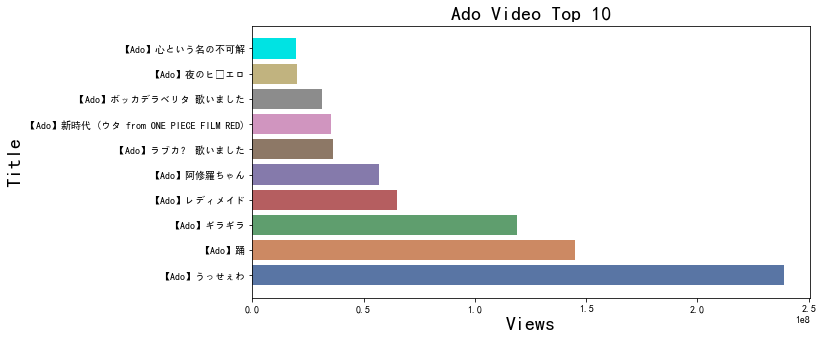

In [55]:
fig = plt.figure(figsize=(10, 5)) 
color = ['#5975a4', '#cc8963', '#5f9e6e', '#b55e60', '#857aab', '#8d7866', '#d095bf', '#8c8c8c', '#c1b37f', '#00E3E3']
# creating the bar plot 
plt.barh(top10_videos['Title'], top10_videos['Views'], color=color) 
  
plt.xlabel("Views",fontsize=20) 
plt.ylabel("Title",fontsize=20) 
plt.title("Ado Video Top 10",fontsize=20)
plt.show()

## Âä†ÂÖ•Êúà‰ªΩ

In [63]:
video_data['Month'] = pd.to_datetime(video_data['PublishedAt']).dt.strftime('%b')
video_data

Title  \
0                      „Äê„Ç¢„Éº„Ç´„Ç§„Éñ„Äë„É©„Ç§„Éñ„ÅÆ„ÅäÈ°ò„ÅÑ„Å®„Ç´„É†„Éë„Éç„É´„É©„ÅÆÊÑüÊÉ≥   
1   „ÄêAdo„ÄëTot MusicaÔºà„Ç¶„Çø from ONE PIECE FILM REDÔºâ   
2            Ado„Äé„Ç¶„Çø„ÅÆÊ≠å ONE PIECE FILM RED„ÄèÁô∫Â£≤Ë®òÂøµÁâπÁï™   
3       „ÄêAdo„Äë‰∏ñÁïå„ÅÆ„Å§„Å•„ÅçÔºà„Ç¶„Çø from ONE PIECE FILM REDÔºâ   
4     „ÄêAdo„Äë„Ç¶„Çø„Ç´„Çø„É©„É©„Éê„Ç§Ôºà„Ç¶„Çø from ONE PIECE FILM REDÔºâ   
..                                          ...   
75                              „ÄêAdo„ÄëÊÅãÊÑõË£ÅÂà§ Ê≠å„ÅÑ„Åæ„Åó„Åü   
76                   „ÄêAdo„ÄëËÑ≥ÂÜÖÈù©ÂëΩ„Ç¨„Éº„É´ Ê≠å„ÅÑ„Åæ„Åó„Åü„Äê„ÉØ„É≥„Ç≥„Éº„É©„Çπ„Äë   
77                    „ÄêAdo„Äë„Ç≠„É©„Ç§„Éª„Ç≠„É©„Ç§„Éª„Ç∏„Ç¨„Éí„ÉÄ„Ç§ÔºÅ Ê≠å„ÅÑ„Åæ„Åó„Åü   
78                  „ÄêAdo„ÄëÂ¶ÑÊÉ≥ÊÑüÂÇ∑‰ª£ÂÑüÈÄ£Áõü Ê≠å„ÅÑ„Åæ„Åó„Åü„Äê„ÉØ„É≥„Ç≥„Éº„É©„Çπ„Äë   
79                      „ÄêAdo„Äë„É°„Éº„Éô„É´ Ê≠å„ÅÑ„Åæ„Åó„Åü„Äê„ÉØ„É≥„Ç≥„Éº„É©„Çπ„Äë   

                                          Description PublishedAt Lauguage  \
0           Êï∞Êó•Èñì„Å†„Åë„Ç¢„Éº„Ç´„Ç§„Éñ„ÇíÊÆã„Åó„Åæ„Åô\n\n„Åì„Çå„Åã„Çâ„ÅÆ„É©„Ç§„Éñ„Å´ÂèÇÂä†„Åô„ÇãÊñπ„ÅØËÅû„ÅÑ„Å¶„Åè„Å†„Åï„ÅÑ  2022-08-21    en-US   
1   Ê±Ç„ÇÅ„Çâ„Çå„Åü„ÇãÊïë‰∏ñ‰∏ª\n\n‚ñº„ÄéTot Musica„Äè Streaming & Downloa...  2022-08-17       ja   
2   „Ç¢„É´„Éê„É†„Äé„Ç¶„Çø„ÅÆÊ≠å ONE PIECE FILM RED„ÄèÁô∫Â£≤Ë®òÂøµÁâπÁï™„Ç¢„Éº„Ç´„Ç§„ÉñÂÖ¨Èñã‰∏≠ÔºÅ\n...  2022-08-10       ja   
3   „Åæ„Åü„Åä„Çì„Å™„ÅòÊ≠å„ÇíÊ≠å„ÅÜ„Åü„Å≥\n„ÅÇ„Å™„Åü„ÇíÊÉ≥„ÅÜ„Åß„Åó„Çá„ÅÜ\n\n‚ñº„Äé‰∏ñÁïå„ÅÆ„Å§„Å•„Åç„Äè Streamin...  2022-08-10       ja   
4   „Çè„Åü„Åó„Åå„ÇÑ„Çâ„Å™„Åç„ÇÉ „Å†„Åã„ÇâÈÇ™È≠î„Åó„Å™„ÅÑ„Åß„ÄÄ„ÅäÈ°ò„ÅÑ...\n\n‚ñº„Äé„Ç¶„Çø„Ç´„Çø„É©„É©„Éê„Ç§„Äè Stre...  2022-08-06       ja   
..                                                ...         ...      ...   
75  Ê≠å„Å£„Å¶„Åø„Åü„É™„Çπ„Éà\nhttps://www.youtube.com/playlist?lis...  2018-08-26       ja   
76  Ê≠å„Å£„Å¶„Åø„Åü„É™„Çπ„Éà\nhttps://www.youtube.com/playlist?lis...  2018-08-26       ja   
77  Ê≠å„Å£„Å¶„Åø„Åü„É™„Çπ„Éà\nhttps://www.youtube.com/playlist?lis...  2018-08-26       ja   
78  Ê≠å„Å£„Å¶„Åø„Åü„É™„Çπ„Éà\nhttps://www.youtube.com/playlist?lis...  2018-08-26       ja   
79  Ê≠å„Å£„Å¶„Åø„Åü„É™„Çπ„Éà\nhttps://www.youtube.com/playlist?lis...  2018-08-26       ja   

       Views   Likes  CommentCount  \
0     696980   33471           476   
1    6908302  362332         11343   
2    1446351   45970          2232   
3    3628663  136588          3880   
4   10318747  252443          7081   
..       ...     ...           ...   
75   7122042   92198          1843   
76    461723   13002           550   
77   4416140   74480          1612   
78   1257211   37643           575   
79   1050952   28693           979   

                                               Image Month  
0   https://i.ytimg.com/vi/oL6ooQb-ZRQ/hqdefault.jpg   Aug  
1   https://i.ytimg.com/vi/V9_ZpqfqHFI/hqdefault.jpg   Aug  
2   https://i.ytimg.com/vi/d7DTFuMnoxg/hqdefault.jpg   Aug  
3   https://i.ytimg.com/vi/b3GCfyNKeLs/hqdefault.jpg   Aug  
4   https://i.ytimg.com/vi/hyV1AJiFNyo/hqdefault.jpg   Aug  
..                                               ...   ...  
75  https://i.ytimg.com/vi/iHIrEqU5cwM/hqdefault.jpg   Aug  
76  https://i.ytimg.com/vi/qL3chh5M5d0/hqdefault.jpg   Aug  
77  https://i.ytimg.com/vi/gmJiYoRhO5g/hqdefault.jpg   Aug  
78  https://i.ytimg.com/vi/Io9gOyAlq9g/hqdefault.jpg   Aug  
79  https://i.ytimg.com/vi/hOxAQO57zyY/hqdefault.jpg   Aug  

[80 rows x 9 columns]

In [64]:
video_data.to_excel('video_details.xlsx')

## È°ØÁ§∫Êúà‰ªΩ‰∏äÂÇ≥ÂΩ±ÁâáÊï∏ÈáèÂèäÊéíÂ∫è

In [65]:
videos_per_month = video_data.groupby('Month', as_index=False).size()
videos_per_month

Month  size
0    Apr     3
1    Aug    17
2    Dec    11
3    Feb     4
4    Jan     7
5    Jul     6
6    Jun     8
7    Mar     4
8    May     4
9    Nov     2
10   Oct     7
11   Sep     7

In [66]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [67]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories = sort_order, ordered=True)
videos_per_month = videos_per_month.sort_index()
videos_per_month

Month  size
Month            
Jan     Jan     7
Feb     Feb     4
Mar     Mar     4
Apr     Apr     3
May     May     4
Jun     Jun     8
Jul     Jul     6
Aug     Aug    17
Sep     Sep     7
Oct     Oct     7
Nov     Nov     2
Dec     Dec    11

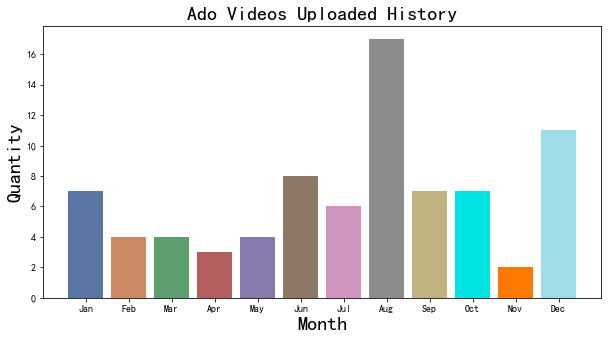

In [68]:
fig = plt.figure(figsize=(10, 5)) 
color = ['#5975a4', '#cc8963', '#5f9e6e', '#b55e60', '#857aab', '#8d7866', '#d095bf', '#8c8c8c', '#c1b37f', '#00E3E3', '#ff7801','#9edcea']
# creating the bar plot 
plt.bar(videos_per_month['Month'], videos_per_month['size'], color=color) 
  
plt.xlabel("Month",fontsize=20) 
plt.ylabel("Quantity",fontsize=20) 
plt.title("Ado Videos Uploaded History",fontsize=20)
plt.show()